In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('default')

## `Problem 1 to 5`:

Dataset link: https://tinyurl.com/2fe6vz4u

**Add a label to every axis and add a proper title for the charts. Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

### **`Problem-1:`** Draw a line plot of which, the x-axis is the "Year" and the y-axis is sum of "PM2.5" of two countries Iran and China.

In [35]:
# code here
df = pd.read_csv('https://tinyurl.com/2fe6vz4u')
df.head()

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018
3,3,4,India,Varanasi,2016,146,>75%,260,NaN,2018
4,4,5,India,Patna,2016,144,>75%,266,NaN,2018


In [36]:
# My attempt
temp_df_iran = df.groupby(['Country', 'Year'])['PM2.5'].sum()['Iran']
temp_df_china = df.groupby(['Country', 'Year'])['PM2.5'].sum()['China']
temp_df_iran

Year
2012      37
2013      66
2014      31
2016    1453
Name: PM2.5, dtype: int64

Text(0.5, 0, 'Years')

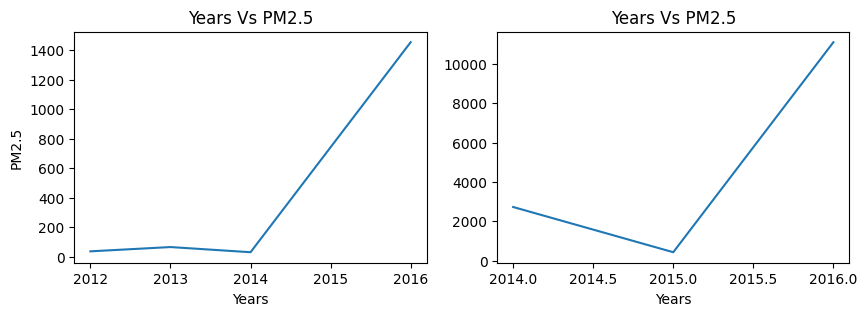

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

ax[0].plot(temp_df_iran.index, temp_df_iran.values)
ax[1].plot(temp_df_china.index, temp_df_china.values)

ax[0].set_title('Years Vs PM2.5')
ax[0].set_xlabel('Years')
ax[0].set_ylabel('PM2.5')

ax[1].set_title('Years Vs PM2.5')
ax[1].set_xlabel('Years')


In [38]:
# Actual Solution
iran_series = df.query('Country == "Iran"').groupby('Year')['PM2.5'].sum()
china_series = df.query('Country == "China"').groupby('Year')['PM2.5'].sum()
iran_series

Year
2012      37
2013      66
2014      31
2016    1453
Name: PM2.5, dtype: int64

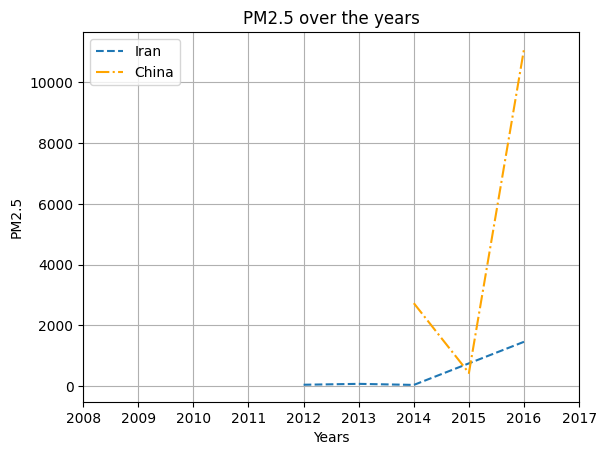

In [39]:
plt.plot(iran_series.index, iran_series.values, label='Iran', linestyle='dashed')
plt.plot(china_series.index, china_series.values, label='China', linestyle='dashdot', c='orange')
plt.title('PM2.5 over the years')
plt.xlabel('Years')
plt.ylabel('PM2.5')
plt.xticks(df['Year'].value_counts().index)
plt.legend()
plt.grid()
plt.show()

### **`Problem-2:`** Draw a histogram of the  column "PM10" of which the y-axis represents the probability (see the documentation how to draw the probability).

In [40]:
# My Attempt
# def my_dist(x):
#     return np.exp(-x ** 2)
# 
# 
# y = my_dist(df.PM10)
# plt.hist(df.PM10, y)
# plt.show()

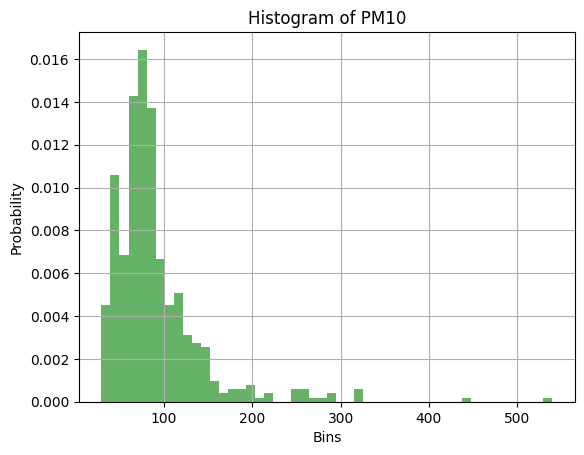

In [41]:
# Actual Solution
plt.hist(df.PM10, density=True, bins=50, facecolor='green', alpha=0.6)
plt.title('Histogram of PM10')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.grid()
plt.show()

### **`Problem-3:`** Draw a scatter plot where x-axis represents "PM2.5" and y-axis represents "PM10" for two countries Poland and Chile.

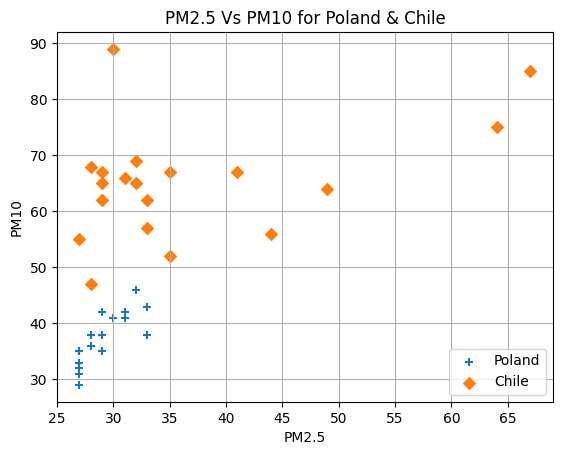

In [52]:
poland_df = df.query("Country == 'Poland'")
chile_df = df.query("Country == 'Chile'")

plt.scatter(poland_df['PM2.5'], poland_df['PM10'], label='Poland', marker='+')
plt.scatter(chile_df['PM2.5'], chile_df['PM10'], label='Chile', marker='D')
plt.title('PM2.5 Vs PM10 for Poland & Chile')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.legend()
plt.grid()
plt.show()

### **`Problem-4:`** Draw a pie chart of top 5 most frequent countries.

In [59]:
freq_ser = df['Country'].value_counts().head()
freq_ser

Country
China     283
Iran       43
India      32
Chile      19
Poland     17
Name: count, dtype: int64

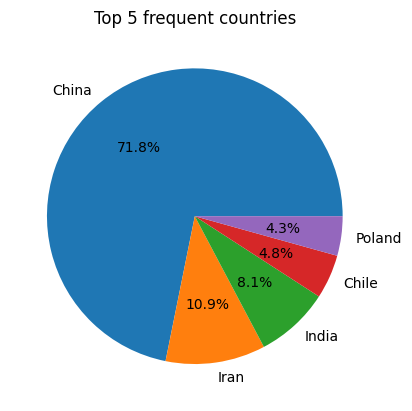

In [63]:
plt.pie(freq_ser, labels=freq_ser.index, autopct='%0.1f%%')
plt.title('Top 5 frequent countries')
plt.show()

### **`Problem-5:`** Draw a bar chart which represents the counts of top 5 most frequent countries.



Text(0, 0.5, 'Freq. count')

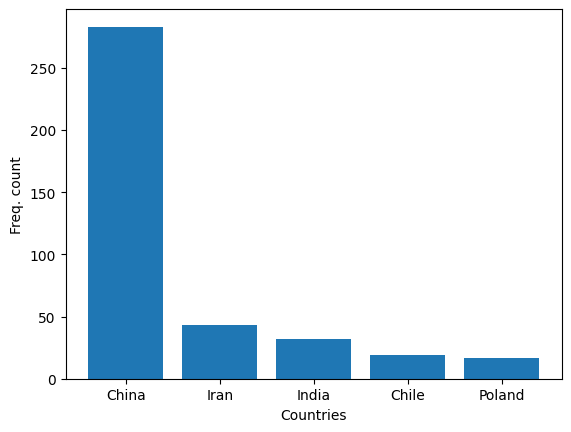

In [67]:
plt.bar(freq_ser.index, freq_ser)
plt.xlabel('Countries')
plt.ylabel('Freq. count')

## `Problem 6-10`
Data Set - https://docs.google.com/spreadsheets/d/e/2PACX-1vTJh6X4_mqixWsfK9mgkllGQkKYW9Wj9kOIMGY2uYsWeS8n5np87DO-SDGQWJ1HXEnxiOVFVzYFYEcR/pub?gid=558678488&single=true&output=csv

This is a Sales data of any company in a Year.


### `Problem-6`
Show a line plot of Total Profit for each month with below styling.
* Dotted Line
* Line Color Blue
* Show Legend at top left
* Circle Marker

In [68]:
# code here
df_6 = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/e/2PACX-1vTJh6X4_mqixWsfK9mgkllGQkKYW9Wj9kOIMGY2uYsWeS8n5np87DO-SDGQWJ1HXEnxiOVFVzYFYEcR/pub?gid=558678488&single=true&output=csv')
df_6.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


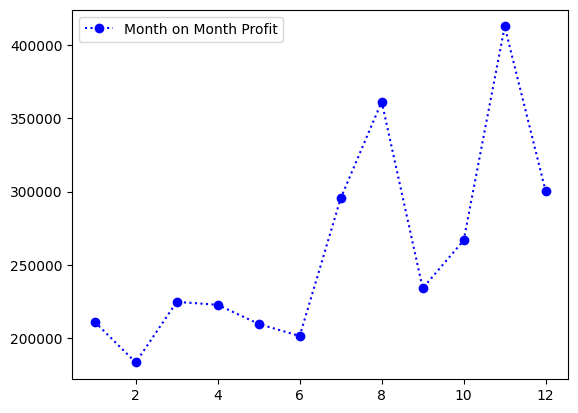

In [77]:
plt.plot(df_6.month_number, df_6.total_profit, color='blue', linestyle='dotted', label='Month on Month Profit',
         marker='o')
plt.legend(loc='upper left')

### `Problem-7`
Show sales of each product in march month as pie chart.
* Show Percentage value
* Give Title "Sales in March"
* Explode ToothPaste with shadow

In [94]:
sales = df_6.iloc[2][1:7]
sales

facecream      2140
facewash       1340
toothpaste     4550
bathingsoap    9550
shampoo        3550
moisturizer    1340
Name: 2, dtype: int64

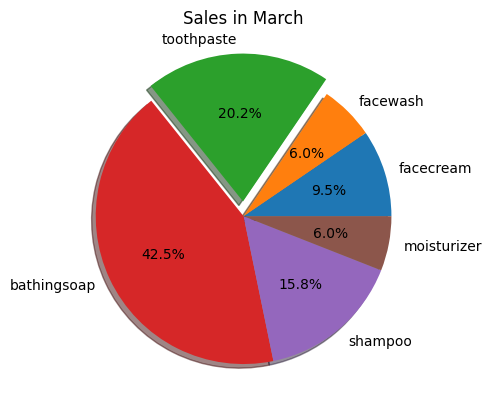

In [98]:
plt.pie(sales, labels=sales.index, autopct='%0.1f%%', explode=[0, 0, 0.1, 0, 0, 0], shadow=True)
plt.title('Sales in March')
plt.show()

### `Problem-8` Multiline Plot of all products sales.
* Give different styes for each products
* Add legend at top right

In [103]:
df_6

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


In [99]:
month_list = df_6['month_number'].to_list()
month_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

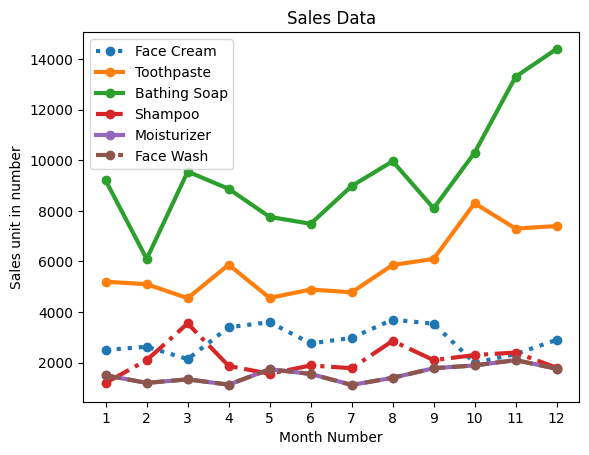

In [102]:
plt.plot(month_list, df_6['facecream'], label='Face Cream', linestyle='dotted', marker='o', linewidth=3)
plt.plot(month_list, df_6['toothpaste'], label='Toothpaste', marker='o', linewidth=3)
plt.plot(month_list, df_6['bathingsoap'], label='Bathing Soap', marker='o', linewidth=3)
plt.plot(month_list, df_6['shampoo'], label='Shampoo', linestyle='dashdot', marker='o', linewidth=3)
plt.plot(month_list, df_6['moisturizer'], label='Moisturizer', marker='o', linewidth=3)
plt.plot(month_list, df_6['facewash'], label='Face Wash', linestyle='dashed', marker='o', linewidth=3)

plt.title('Sales Data')
plt.xlabel('Month Number')
plt.ylabel('Sales unit in number')
plt.legend(loc='upper left')
plt.xticks(month_list)
plt.show()

### `Problem-9` Show Quarter wise Sales data for all products as multi Bar chart.


In [108]:
[f'2020-{month}-01' for month in df_6.month_number]

['2020-1-01',
 '2020-2-01',
 '2020-3-01',
 '2020-4-01',
 '2020-5-01',
 '2020-6-01',
 '2020-7-01',
 '2020-8-01',
 '2020-9-01',
 '2020-10-01',
 '2020-11-01',
 '2020-12-01']

In [110]:
df_6['date'] = pd.to_datetime([f'2020-{month}-01' for month in df_6.month_number], dtype=pd.date)
df_6.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit,date
0,1,2500,1500,5200,9200,1200,1500,21100,211000,2020-01-01
1,2,2630,1200,5100,6100,2100,1200,18330,183300,2020-02-01
2,3,2140,1340,4550,9550,3550,1340,22470,224700,2020-03-01
3,4,3400,1130,5870,8870,1870,1130,22270,222700,2020-04-01
4,5,3600,1740,4560,7760,1560,1740,20960,209600,2020-05-01


In [111]:
df_6.date.dt.quarter

0     1
1     1
2     1
3     2
4     2
5     2
6     3
7     3
8     3
9     4
10    4
11    4
Name: date, dtype: int32

In [116]:
final_df = df_6.groupby(df_6['date'].dt.quarter).sum(numeric_only=True)
final_df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
date,,,,,,,,,
1,6,7270,4040,14850,24850,6850,4040,61900,619000
2,15,9760,4425,15320,24120,5320,4425,63370,633700
3,24,10220,4300,16740,27040,6740,4300,89090,890900
4,33,7230,5750,23000,38000,6500,5750,97970,979700


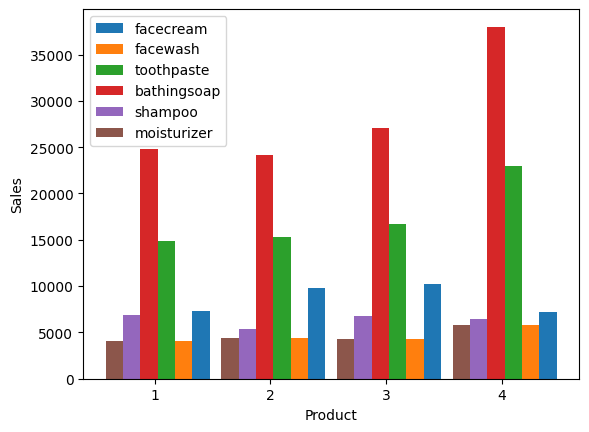

In [127]:
i = -1

for col in final_df.columns[1:7]:
    plt.bar([a + i for a in final_df.index], final_df[col], width=0.15, label=col)
    i = i - 0.15

plt.xticks(final_df.index - 1.4, final_df.index)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.legend()
plt.show()

### `Problem-10` Plot Stacked Bar chart quarter wise for each product.

In [128]:
final_df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
date,,,,,,,,,
1,6,7270,4040,14850,24850,6850,4040,61900,619000
2,15,9760,4425,15320,24120,5320,4425,63370,633700
3,24,10220,4300,16740,27040,6740,4300,89090,890900
4,33,7230,5750,23000,38000,6500,5750,97970,979700


In [130]:
all_cols = []

for col in final_df.columns[1:7]:
    if len(all_cols) == 0:
        
    all_cols.append(final_df[col])

all_cols

[date
 1     7270
 2     9760
 3    10220
 4     7230
 Name: facecream, dtype: int64,
 date
 1    4040
 2    4425
 3    4300
 4    5750
 Name: facewash, dtype: int64,
 date
 1    14850
 2    15320
 3    16740
 4    23000
 Name: toothpaste, dtype: int64,
 date
 1    24850
 2    24120
 3    27040
 4    38000
 Name: bathingsoap, dtype: int64,
 date
 1    6850
 2    5320
 3    6740
 4    6500
 Name: shampoo, dtype: int64,
 date
 1    4040
 2    4425
 3    4300
 4    5750
 Name: moisturizer, dtype: int64]